In [125]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#显式Euler,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def euler(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        yi=y[i]+h*f(xx[i],y[i])
        y.append(yi)
    return y
#改进Euler,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def ieuler(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        yi=y[i]+h/2*(f(xx[i],y[i])+f(xx[i+1],y[i]+h*f(xx[i],y[i])))
        y.append(yi)
    return y
#三级三阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def RK3(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        k1=f(xx[i],y[i])
        k2=f(xx[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(xx[i]+h,y[i]-h*k1+2*h*k2)
        yi=y[i]+(h/6)*(k1+4*k2+k3)
        y.append(yi)
    return y
#四级四阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点
def RK4(f,h,x0,y0,x):
    xx=np.arange(x0,x+h,h)
    y=[y0]
    for i in range(len(xx)-1):
        k1=f(xx[i],y[i])
        k2=f(xx[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(xx[i]+0.5*h,y[i]+0.5*h*k2)
        k4=f(xx[i]+h,y[i]+h*k3)
        yi=y[i]+(h/6)*(k1+2*k2+2*k3+k4)
        y.append(yi)
    return y

In [126]:
#问题1
#u'=-5u,u(0)=1,0<=t<=1
#精确解:u=e^(-5t)
f=lambda t,u:-5*u

In [127]:
f=lambda t,u:-5*u
t=np.arange(0,1+2**(-3),2**(-3))
u=[math.e**(-5*i) for i in t]
u1=euler(f,2**(-3),0,1,1)
u2=ieuler(f,2**(-3),0,1,1)
u3=RK3(f,2**(-3),0,1,1)
u4=RK4(f,2**(-3),0,1,1)

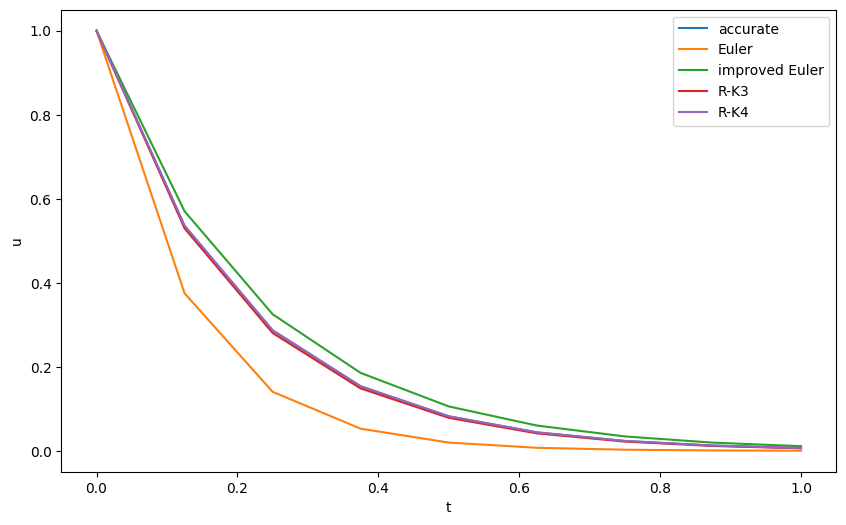

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(t,u,label="accurate")
plt.plot(t,u1,label="Euler")
plt.plot(t,u2,label="improved Euler")
plt.plot(t,u3,label="R-K3")
plt.plot(t,u4,label="R-K4")
plt.xlabel("t")
plt.ylabel("u")
plt.legend()

In [129]:
H=[0.1,0.01,0.001,0.0001]
for h in H:
    t=np.arange(0,1+h,h)
    u=[math.e**(-5*i) for i in t]
    u1=euler(f,h,0,1,1)
    u2=ieuler(f,h,0,1,1)
    u3=RK3(f,h,0,1,1)
    u4=RK4(f,h,0,1,1)
    ab_e1=abs(u1[-1]-u[-1])
    ab_e2=abs(u2[-1]-u[-1])
    ab_e3=abs(u3[-1]-u[-1])
    ab_e4=abs(u4[-1]-u[-1])
    re_e1=abs(u1[-1]-u[-1])/u[-1]
    re_e2=abs(u2[-1]-u[-1])/u[-1]
    re_e3=abs(u3[-1]-u[-1])/u[-1]
    re_e4=abs(u4[-1]-u[-1])/u[-1]
    print("h="+str(h))
    print("绝对误差:")
    print(ab_e1)
    print(ab_e2)
    print(ab_e3)
    print(ab_e4)
    print("相对误差:")
    print(re_e1)
    print(re_e2)
    print(re_e3)
    print(re_e4)
        


h=0.1
绝对误差:
0.005761384499085469
0.0023570000186438136
0.00025805742120810996
2.672847229504092e-05
相对误差:
0.8550652743138901
0.34980981877176026
0.03829911711135984
0.0039668570112927175
h=0.01
绝对误差:
0.0008174177787514435
1.459008354069355e-05
1.8263194891295076e-07
1.8293751270770375e-09
相对误差:
0.12131555485111271
0.0021653603898448355
2.7104984491231396e-05
2.715033417931806e-07
h=0.001
绝对误差:
8.397842025348237e-05
1.4090282395538833e-07
1.761707116992861e-10
1.762028023488682e-13
相对误差:
0.012463502646263117
2.0911833229693386e-05
2.6146051864640295e-08
2.6150814539322428e-11
h=0.0001
绝对误差:
8.419976942445305e-06
1.4042655658089154e-09
1.755973838557523e-13
4.336808689942018e-18
相对误差:
0.0012496353775991612
2.0841148884066826e-07
2.6060962468179976e-11
6.436394780978013e-16


In [130]:
H=[0.1,0.01,0.001,0.0001]
ab1=[]
ab2=[]
ab3=[]
ab4=[]
re1=[]
re2=[]
re3=[]
re4=[]
for h in H:
    t=np.arange(0,1+h,h)
    u=[math.e**(-5*i) for i in t]
    u1=euler(f,h,0,1,1)
    u2=ieuler(f,h,0,1,1)
    u3=RK3(f,h,0,1,1)
    u4=RK4(f,h,0,1,1)
    ab_e1=abs(u1[-1]-u[-1])
    ab_e2=abs(u2[-1]-u[-1])
    ab_e3=abs(u3[-1]-u[-1])
    ab_e4=abs(u4[-1]-u[-1])
    re_e1=abs(u1[-1]-u[-1])/u[-1]
    re_e2=abs(u2[-1]-u[-1])/u[-1]
    re_e3=abs(u3[-1]-u[-1])/u[-1]
    re_e4=abs(u4[-1]-u[-1])/u[-1]
    ab1.append(ab_e1)
    ab2.append(ab_e2)
    ab3.append(ab_e3)
    ab4.append(ab_e4)
    re1.append(re_e1)
    re2.append(re_e2)
    re3.append(re_e3)
    re4.append(re_e4)

the p of absolute error is 0.9450719858694804
the p of relative error is 0.9450719858694804


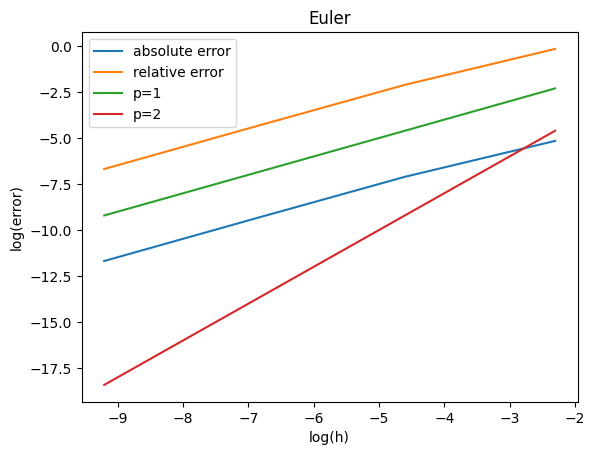

In [131]:
lgh=[math.log(i) for i in H]
lgh2=[2*i for i in lgh]
lgabe=[math.log(i) for i in ab1]
lgre=[math.log(i) for i in re1]
plt.plot(lgh,lgabe,label='absolute error')
plt.plot(lgh,lgre,label='relative error')
plt.plot(lgh,lgh,label='p=1')
plt.plot(lgh,lgh2,label='p=2')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('Euler')
plt.legend()
ap1=math.log(ab1[1]/ab1[0])/math.log(0.1)
ap2=math.log(ab1[2]/ab1[1])/math.log(0.1)
ap3=math.log(ab1[3]/ab1[2])/math.log(0.1)
ap=(ap1+ap2+ap3)/3
rp1=math.log(re1[1]/re1[0])/math.log(0.1)
rp2=math.log(re1[2]/re1[1])/math.log(0.1)
rp3=math.log(re1[3]/re1[2])/math.log(0.1)
rp=(rp1+rp2+rp3)/3
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

the p of absolute error is 2.0749701131257523
the p of relative error is 2.0749701131257523


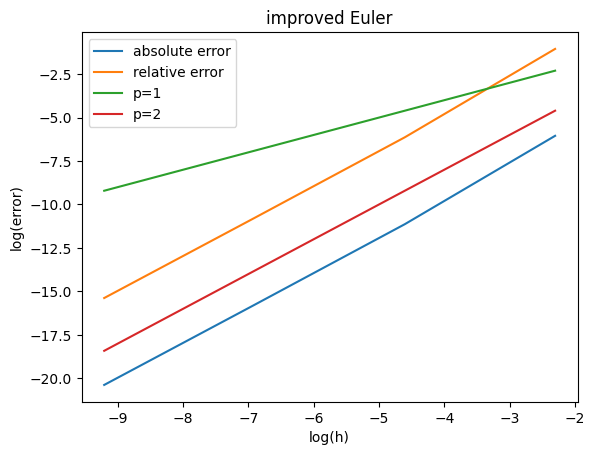

In [132]:
lgh=[math.log(i) for i in H]
lgh2=[2*i for i in lgh]
lgabe=[math.log(i) for i in ab2]
lgre=[math.log(i) for i in re2]
plt.plot(lgh,lgabe,label='absolute error')
plt.plot(lgh,lgre,label='relative error')
plt.plot(lgh,lgh,label='p=1')
plt.plot(lgh,lgh2,label='p=2')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('improved Euler')
plt.legend()
ap1=math.log(ab2[1]/ab2[0])/math.log(0.1)
ap2=math.log(ab2[2]/ab2[1])/math.log(0.1)
ap3=math.log(ab2[3]/ab2[2])/math.log(0.1)
ap=(ap1+ap2+ap3)/3
rp1=math.log(re2[1]/re2[0])/math.log(0.1)
rp2=math.log(re2[2]/re2[1])/math.log(0.1)
rp3=math.log(re2[3]/re2[2])/math.log(0.1)
rp=(rp1+rp2+rp3)/3
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

the p of absolute error is 3.055732770582859
the p of relative error is 3.055732770582859


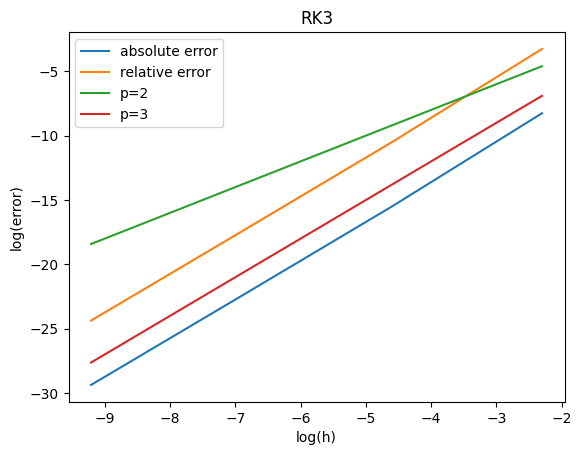

In [133]:
lgh3=[3*i for i in lgh]
lgabe=[math.log(i) for i in ab3]
lgre=[math.log(i) for i in re3]
plt.plot(lgh,lgabe,label='absolute error')
plt.plot(lgh,lgre,label='relative error')
plt.plot(lgh,lgh2,label='p=2')
plt.plot(lgh,lgh3,label='p=3')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('RK3')
plt.legend()
ap1=math.log(ab3[1]/ab3[0])/math.log(0.1)
ap2=math.log(ab3[2]/ab3[1])/math.log(0.1)
ap3=math.log(ab3[3]/ab3[2])/math.log(0.1)
ap=(ap1+ap2+ap3)/3
rp1=math.log(re3[1]/re3[0])/math.log(0.1)
rp2=math.log(re3[2]/re3[1])/math.log(0.1)
rp3=math.log(re3[3]/re3[2])/math.log(0.1)
rp=(rp1+rp2+rp3)/3
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

the p of absolute error is 4.090480662765305
the p of relative error is 4.090480662765306


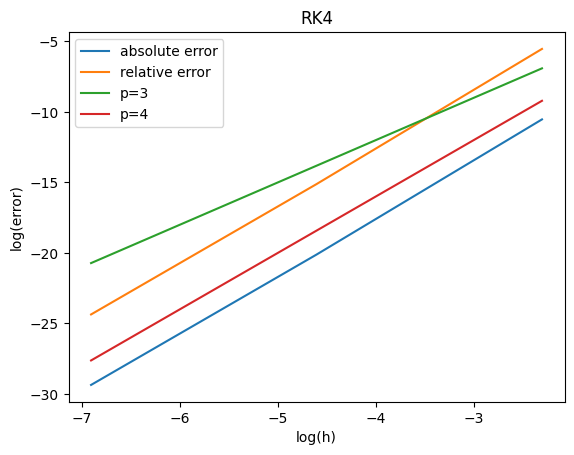

In [141]:
lgh4=[4*i for i in lgh]
lgabe=[math.log(i) for i in ab4]
lgre=[math.log(i) for i in re4]
plt.plot(lgh[:3],lgabe[:3],label='absolute error')
plt.plot(lgh[:3],lgre[:3],label='relative error')
plt.plot(lgh[:3],lgh3[:3],label='p=3')
plt.plot(lgh[:3],lgh4[:3],label='p=4')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('RK4')
plt.legend()
ap1=math.log(ab4[1]/ab4[0])/math.log(0.1)
ap2=math.log(ab4[2]/ab4[1])/math.log(0.1)
ap3=math.log(ab4[3]/ab4[2])/math.log(0.1)
ap=(ap1+ap2)/2
rp1=math.log(re4[1]/re4[0])/math.log(0.1)
rp2=math.log(re4[2]/re4[1])/math.log(0.1)
rp3=math.log(re4[3]/re4[2])/math.log(0.1)
rp=(rp1+rp2)/2
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

In [6]:
#显式Euler,f为du/dt，h为步长，x0,y0为t,u初值向量，x为t终值点（多元）
def eulervector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        y= y + h*F(t,y)
        t = t + h
        u.append(y[0])
    return u
# 改进Euler,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点（多元）
def ieulervector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        y1= y + h*F(t,y)
        y=y+h/2*(F(t,y1)+F(t,y))
        t = t + h
        u.append(y[0])
    return u
#三级三阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点（多元）
def RK3vector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        k1 =  F(t, y)
        k2 =  F(t + h/2, y + h*k1/2)
        k3 =  F(t + h, y-h*k1+2*h*k2)
        y = y + (k1 + 4*k2 +k3)*h / 6
        t = t + h
        u.append(y[0])
    return u
#四级四阶R-K方法,f为du/dt，h为步长，x0,y0为t,u初值，x为t终值点（多元）
def RK4vector(F,h, t0, y0, x):
    xx=np.arange(t0,x+h,h)
    t = t0
    y = y0
    u=[y0[0]]
    for i in range(len(xx)-1):
        k1 =  F(t, y)
        k2 =  F(t + h/2, y + h*k1/2)
        k3 =  F(t + h/2, y+0.5*h*k2)
        k4=F(t+h,y+h*k3)
        y = y + (k1 + 2*k2 +2*k3+k4)*h / 6
        t = t + h
        u.append(y[0])
    return u

In [7]:
#问题2
#u''=-u,u(0)=0,u''(0)=1,0<=t<=1
#精确解:u=sin(t)
x0=0
y0=np.array([0, 1])
x=1
F=lambda t,y:np.array([y[1],-y[0]])

In [8]:
ues=eulervector(F,2**(-3),x0,y0,x)
uis=ieulervector(F,2**(-3),x0,y0,x)
urk3=RK3vector(F,2**(-3),x0,y0 , x)
urk4=RK4vector(F,2**(-3),x0,y0 , x)

In [9]:
t=np.arange(0,1+2**(-3),2**(-3))
u=[math.sin(i) for i in t]

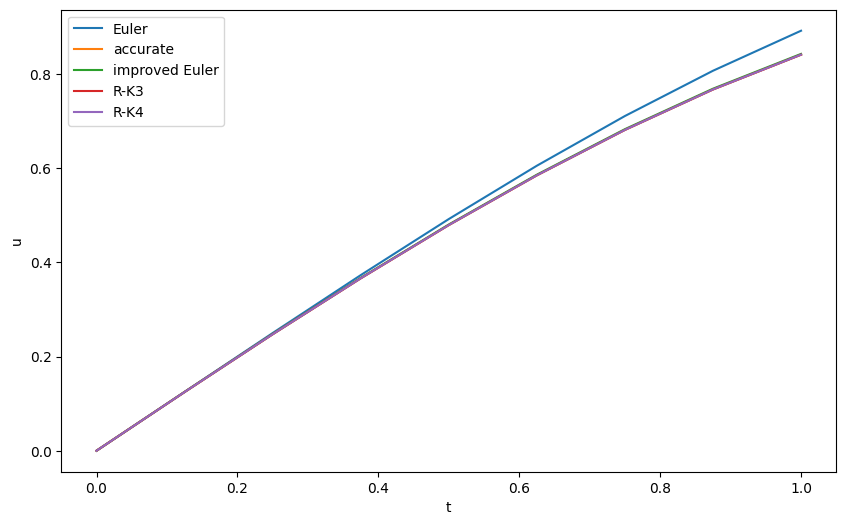

In [10]:
plt.figure(figsize=(10,6))
plt.plot(t,ues,label="Euler")
plt.plot(t,u,label="accurate")
plt.plot(t,uis,label="improved Euler")
plt.plot(t,urk3,label="R-K3")
plt.plot(t,urk4,label="R-K4")
plt.xlabel("t")
plt.ylabel("u")
plt.legend()

In [116]:

H=[0.1,0.01,0.001,0.0001]
f=lambda t,y:np.array([y[1],-y[0]])
for h in H:
    t=np.arange(0,1+h,h)
    u=[math.sin(i) for i in t]
    u1=eulervector(f,h,0,np.array([0, 1]),1)
    u2=ieulervector(f,h,0,np.array([0, 1]),1)
    u3=RK3vector(f,h,0,np.array([0, 1]),1)
    u4=RK4vector(f,h,0,np.array([0, 1]),1)
    ab_e1=abs(u1[-1]-u[-1])
    ab_e2=abs(u2[-1]-u[-1])
    ab_e3=abs(u3[-1]-u[-1])
    ab_e4=abs(u4[-1]-u[-1])
    re_e1=abs(u1[-1]-u[-1])/u[-1]
    re_e2=abs(u2[-1]-u[-1])/u[-1]
    re_e3=abs(u3[-1]-u[-1])/u[-1]
    re_e4=abs(u4[-1]-u[-1])/u[-1]
    print("h="+str(h))
    print("绝对误差:")
    print(ab_e1)
    print(ab_e2)
    print(ab_e3)
    print(ab_e4)
    print("相对误差:")
    print(re_e1)
    print(re_e2)
    print(re_e3)
    print(re_e4)
        


h=0.1
绝对误差:
0.041037025192103616
0.001001931841892345
3.3145047034888186e-05
5.070076222191133e-07
相对误差:
0.0487681998939894
0.0011906908972281213
3.9389411677046746e-05
6.025253768373969e-07
h=0.01
绝对误差:
0.0041995797237840415
9.109836411225203e-06
3.4880022425909374e-08
4.5607739806996506e-11
相对误差:
0.0049907599900699895
1.0826085005539355e-05
4.145124794038181e-08
5.4200014772236645e-11
h=0.001
绝对误差:
0.00042066029255583004
9.01555285981459e-08
3.5043301593873366e-11
5.440092820663267e-15
相对误差:
0.0004999106328685411
1.0714038894487604e-07
4.1645288104465745e-11
6.464979683054921e-15
h=0.0001
绝对误差:
4.2072799789183435e-05
9.006109191744827e-10
3.319566843629218e-14
1.1102230246251565e-16
相对误差:
4.9999109355848365e-05
1.0702816085572904e-09
3.9449569902722886e-14
1.3193836087867186e-16


In [117]:
H=[0.1,0.01,0.001,0.0001]
f=lambda t,y:np.array([y[1],-y[0]])
ab1=[]
ab2=[]
ab3=[]
ab4=[]
re1=[]
re2=[]
re3=[]
re4=[]
for h in H:
    t=np.arange(0,1+h,h)
    u=[math.sin(i) for i in t]
    u1=eulervector(f,h,0,np.array([0, 1]),1)
    u2=ieulervector(f,h,0,np.array([0, 1]),1)
    u3=RK3vector(f,h,0,np.array([0, 1]),1)
    u4=RK4vector(f,h,0,np.array([0, 1]),1)
    ab_e1=abs(u1[-1]-u[-1])
    ab_e2=abs(u2[-1]-u[-1])
    ab_e3=abs(u3[-1]-u[-1])
    ab_e4=abs(u4[-1]-u[-1])
    re_e1=abs(u1[-1]-u[-1])/u[-1]
    re_e2=abs(u2[-1]-u[-1])/u[-1]
    re_e3=abs(u3[-1]-u[-1])/u[-1]
    re_e4=abs(u4[-1]-u[-1])/u[-1]
    ab1.append(ab_e1)
    ab2.append(ab_e2)
    ab3.append(ab_e3)
    ab4.append(ab_e4)
    re1.append(re_e1)
    re2.append(re_e2)
    re3.append(re_e3)
    re4.append(re_e4)

the p of absolute error is 0.9963914857362667
the p of relative error is 0.9963914857362668


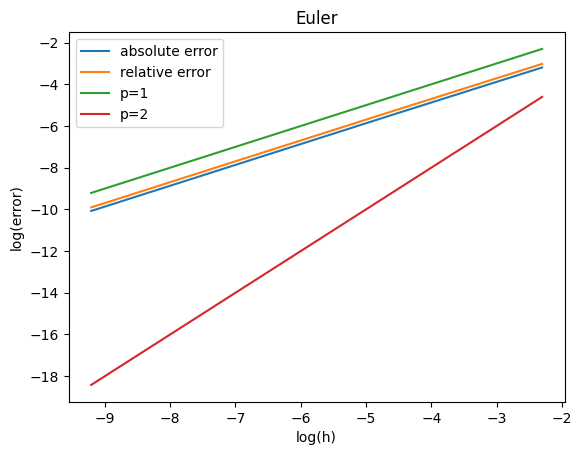

In [118]:
lgh=[math.log(i) for i in H]
lgh2=[2*i for i in lgh]
lgabe=[math.log(i) for i in ab1]
lgre=[math.log(i) for i in re1]
plt.plot(lgh,lgabe,label='absolute error')
plt.plot(lgh,lgre,label='relative error')
plt.plot(lgh,lgh,label='p=1')
plt.plot(lgh,lgh2,label='p=2')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('Euler')
plt.legend()
ap1=math.log(ab1[1]/ab1[0])/math.log(0.1)
ap2=math.log(ab1[2]/ab1[1])/math.log(0.1)
ap3=math.log(ab1[3]/ab1[2])/math.log(0.1)
ap=(ap1+ap2+ap3)/3
rp1=math.log(re1[1]/re1[0])/math.log(0.1)
rp2=math.log(re1[2]/re1[1])/math.log(0.1)
rp3=math.log(re1[3]/re1[2])/math.log(0.1)
rp=(rp1+rp2+rp3)/3
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

the p of absolute error is 2.015433656931201
the p of relative error is 2.015433656931201


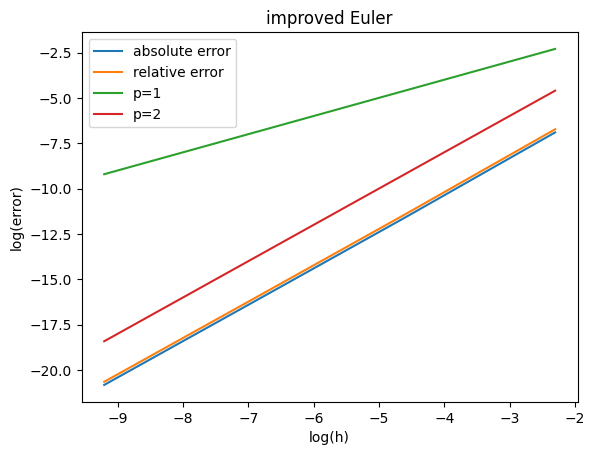

In [119]:
lgh=[math.log(i) for i in H]
lgh2=[2*i for i in lgh]
lgabe=[math.log(i) for i in ab2]
lgre=[math.log(i) for i in re2]
plt.plot(lgh,lgabe,label='absolute error')
plt.plot(lgh,lgre,label='relative error')
plt.plot(lgh,lgh,label='p=1')
plt.plot(lgh,lgh2,label='p=2')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('improved Euler')
plt.legend()
ap1=math.log(ab2[1]/ab2[0])/math.log(0.1)
ap2=math.log(ab2[2]/ab2[1])/math.log(0.1)
ap3=math.log(ab2[3]/ab2[2])/math.log(0.1)
ap=(ap1+ap2+ap3)/3
rp1=math.log(re2[1]/re2[0])/math.log(0.1)
rp2=math.log(re2[2]/re2[1])/math.log(0.1)
rp3=math.log(re2[3]/re2[2])/math.log(0.1)
rp=(rp1+rp2+rp3)/3
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

the p of absolute error is 2.999779073837169
the p of relative error is 2.999779073837169


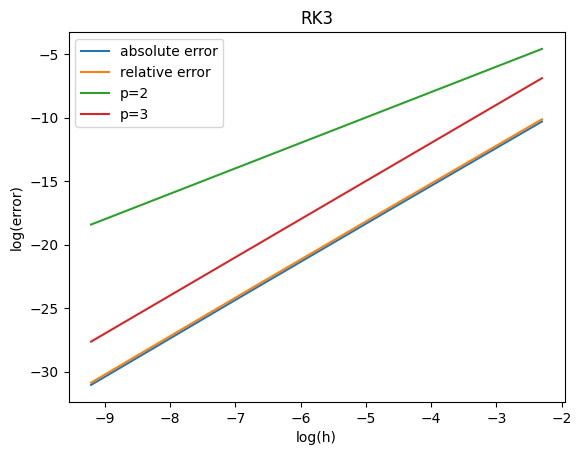

In [120]:
lgh3=[3*i for i in lgh]
lgabe=[math.log(i) for i in ab3]
lgre=[math.log(i) for i in re3]
plt.plot(lgh,lgabe,label='absolute error')
plt.plot(lgh,lgre,label='relative error')
plt.plot(lgh,lgh2,label='p=2')
plt.plot(lgh,lgh3,label='p=3')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('RK3')
plt.legend()
ap1=math.log(ab3[1]/ab3[0])/math.log(0.1)
ap2=math.log(ab3[2]/ab3[1])/math.log(0.1)
ap3=math.log(ab3[3]/ab3[2])/math.log(0.1)
ap=(ap1+ap2+ap3)/3
rp1=math.log(re3[1]/re3[0])/math.log(0.1)
rp2=math.log(re3[2]/re3[1])/math.log(0.1)
rp3=math.log(re3[3]/re3[2])/math.log(0.1)
rp=(rp1+rp2+rp3)/3
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))

the p of absolute error is 3.984704089306905
the p of relative error is 3.984704089306905


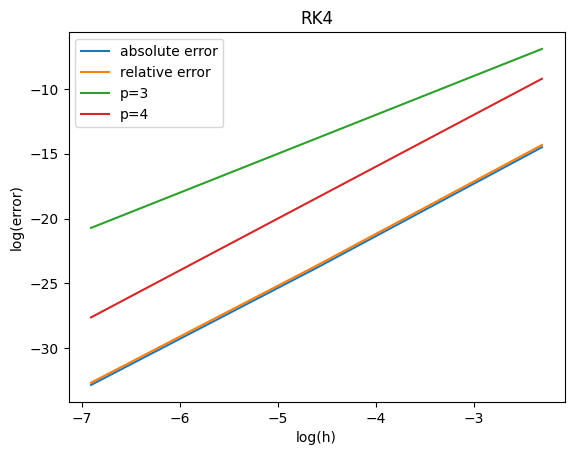

In [121]:
lgh4=[4*i for i in lgh]
lgabe=[math.log(i) for i in ab4]
lgre=[math.log(i) for i in re4]
plt.plot(lgh[:3],lgabe[:3],label='absolute error')
plt.plot(lgh[:3],lgre[:3],label='relative error')
plt.plot(lgh[:3],lgh3[:3],label='p=3')
plt.plot(lgh[:3],lgh4[:3],label='p=4')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.title('RK4')
plt.legend()
ap1=math.log(ab4[1]/ab4[0])/math.log(0.1)
ap2=math.log(ab4[2]/ab4[1])/math.log(0.1)
ap3=math.log(ab4[3]/ab4[2])/math.log(0.1)
ap=(ap1+ap2)/2
rp1=math.log(re4[1]/re4[0])/math.log(0.1)
rp2=math.log(re4[2]/re4[1])/math.log(0.1)
rp3=math.log(re4[3]/re4[2])/math.log(0.1)
rp=(rp1+rp2)/2
print('the p of absolute error is '+str(ap))
print('the p of relative error is '+str(rp))